In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
from PIL import ImageFilter
import matplotlib.pyplot as plt

import os
import sys
from pathlib import Path

from libtiff import TIFF

# Path to image

In [13]:
#prjDir = "/home/charles/Projects/gradientvectorfield"
prjDir = "/home/dhw3172/projects/gradientVectorField"
sys.path.append( Path() / "Python" )

In [14]:
#Fuck you motherfucker
FIG_DIR= Path(prjDir)  / "Figures"
DATA_DIR= Path(prjDir)  / "Data" / "Raster"

In [15]:
pathQcRaster=os.path.join( DATA_DIR, 'qcCroppedNeigh.tif')

# Raster tests

In [16]:
rasterQc=plt.imread(pathQcRaster) 
print(rasterQc.shape)
rasterQc

(1409, 2206, 4)


array([[[ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        ...,
        [  3,   3,   3, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       [[ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       [[ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       ...,

       [[ 27,  27,  27, 255],
        [ 27,  27,  27, 255],
        [ 27,  27,  27, 255],
        ...,
        [  6,   6,   6, 255],
        [  7,   7,   7, 255],
        [  7,   7,   7, 255]],

       [[ 27,  27,  27, 255],
        [ 27,  27,  27, 255],
        [ 27,  27,  27, 255],
        ...,
        [  6,   6,   6, 255],
        [  7,   7,   7, 255],
        [  8,   8,   8, 255]],

       [[ 27

In [23]:
imgQcGray=Image.open(pathQcRaster).convert('LA')
qcGrayMat=np.asarray(imgQcGray)
qcGrayMat.shape

(1409, 2206, 2)

In [28]:
plt.imread(pathQcRaster).shape

(1409, 2206, 4)

In [32]:
#Some weird linear combo of RGB : see https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
qcGrayMat2=np.dot(plt.imread(pathQcRaster)[...,:3], [0.2989, 0.5870, 0.1140])


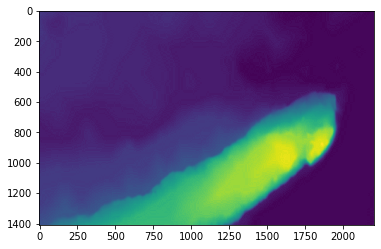

In [33]:
plt.imshow(qcGrayMat2)

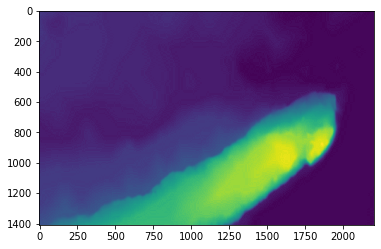

In [41]:
plt.imshow(qcGrayMat[:,:,0])

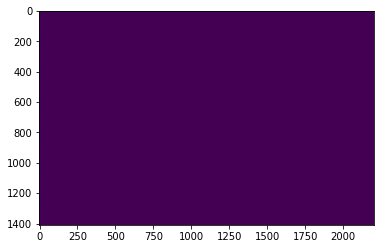

In [42]:
 plt.imshow(qcGrayMat[:,:,1]) #probably correspond to the opacity - ie the alpha 

array([[19.998 , 19.998 , 19.998 , ...,  2.9997,  3.9996,  3.9996],
       [19.998 , 19.998 , 19.998 , ...,  3.9996,  3.9996,  3.9996],
       [19.998 , 19.998 , 19.998 , ...,  3.9996,  3.9996,  3.9996],
       ...,
       [26.9973, 26.9973, 26.9973, ...,  5.9994,  6.9993,  6.9993],
       [26.9973, 26.9973, 26.9973, ...,  5.9994,  6.9993,  7.9992],
       [26.9973, 26.9973, 26.9973, ...,  6.9993,  6.9993,  7.9992]])

(1409, 2206)

(1409, 2206, 4)

# Now try the gradient

In [71]:
 
p = qcGrayMat2 
w,h = qcGrayMat2.shape  
x, y = np.mgrid[0:h:1500j, 0:w:1500j]
print(p.shape)
print(x)
print(w, h)

(1409, 2206)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.47164777e+00 1.47164777e+00 1.47164777e+00 ... 1.47164777e+00
  1.47164777e+00 1.47164777e+00]
 [2.94329553e+00 2.94329553e+00 2.94329553e+00 ... 2.94329553e+00
  2.94329553e+00 2.94329553e+00]
 ...
 [2.20305670e+03 2.20305670e+03 2.20305670e+03 ... 2.20305670e+03
  2.20305670e+03 2.20305670e+03]
 [2.20452835e+03 2.20452835e+03 2.20452835e+03 ... 2.20452835e+03
  2.20452835e+03 2.20452835e+03]
 [2.20600000e+03 2.20600000e+03 2.20600000e+03 ... 2.20600000e+03
  2.20600000e+03 2.20600000e+03]]
1409 2206


In [68]:
 qcGrayMat2.transpose(Image.FLIP_TOP_BOTTOM)

ValueError: axes don't match array

In [51]:
len( np.gradient(p) )

2

In [69]:
dy, dx = np.gradient(p)
skip = (slice(None, None, 100), slice(None, None, 100))

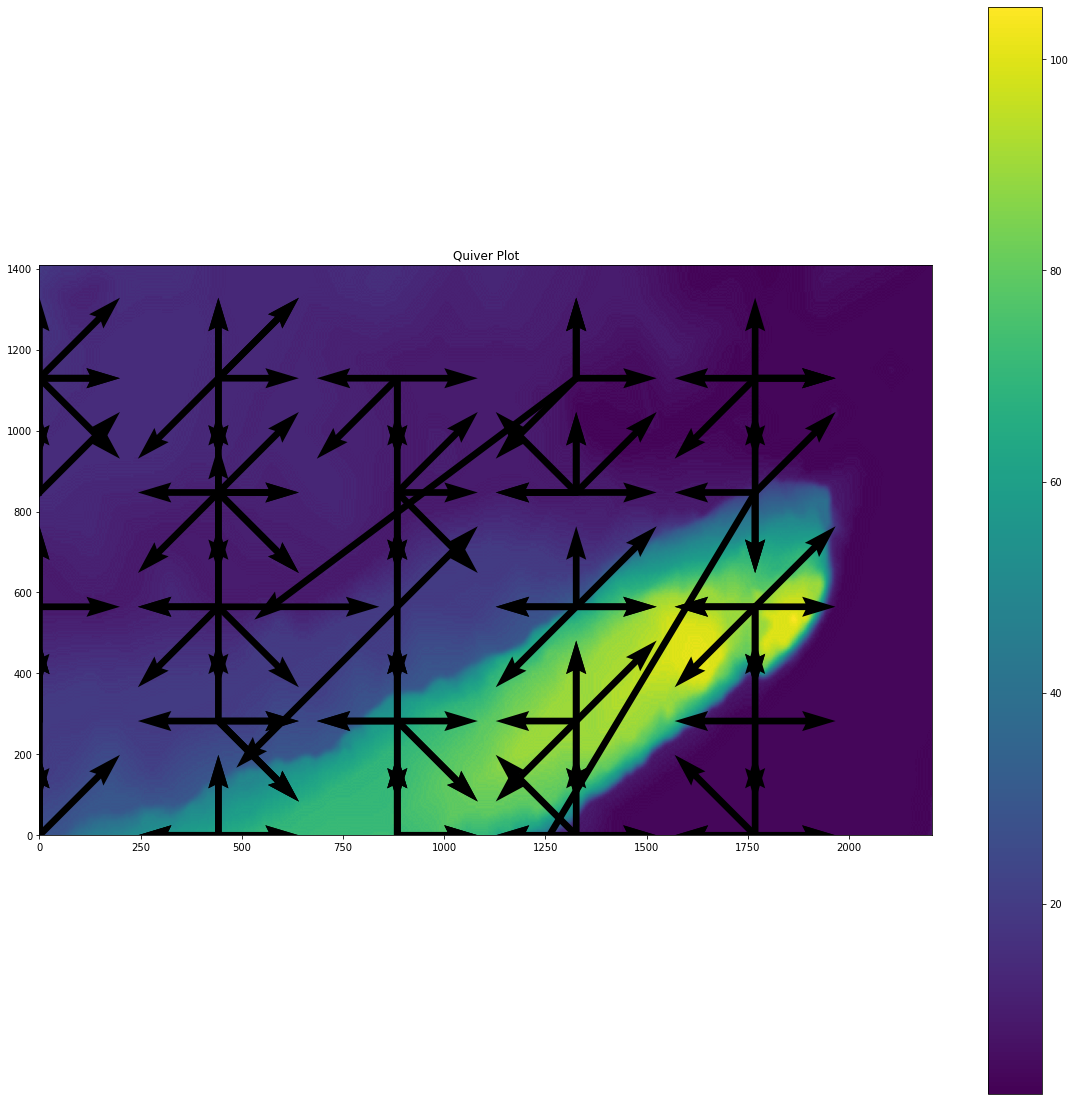

In [70]:

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(qcGrayMat2,
               #I.transpose(Image.FLIP_TOP_BOTTOM), 
               extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar(im)
ax.quiver(x[skip], y[skip], dx[skip].T, dy[skip].T)

ax.set(aspect=1, title='Quiver Plot')
plt.show()
